In [5]:
# Miguel Angel Martinez Moncada 1945469 Practica 7 Data Clustering
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Se lee el dataset preparado
df = pd.read_csv("Data Cleaning dataset-MAMM.csv")

# Se imprime el dataset
print(df)

      vendedor_1  vendedor_2   producto       fecha
0              5           5   CONSOLA9  05/05/2024
1              4           7   SMARTWAT  01/07/2012
2              4          11  CELULAA01  24/07/2010
3              5           9   AIRE2200  03/03/2016
4              5           4   SMARTWAT  30/06/2015
...          ...         ...        ...         ...
4995           2           8   LAPTOP15  21/05/2024
4996           4           6   LAPTOP15  19/08/2018
4997           7           6   CAMARAHD  02/05/2013
4998           6           4       TV42  10/07/2022
4999           3           9    DRONE99  30/09/2023

[5000 rows x 4 columns]


In [6]:
# Codificar producto y convertir fecha
df['fecha_numerica'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y').map(pd.Timestamp.toordinal)
df['producto_cod'] = LabelEncoder().fit_transform(df['producto'])

# Seleccionar columnas para clustering
X = df[['vendedor_1', 'vendedor_2', 'producto_cod', 'fecha_numerica']]

# Escalar los datos para mejor desempeño de K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

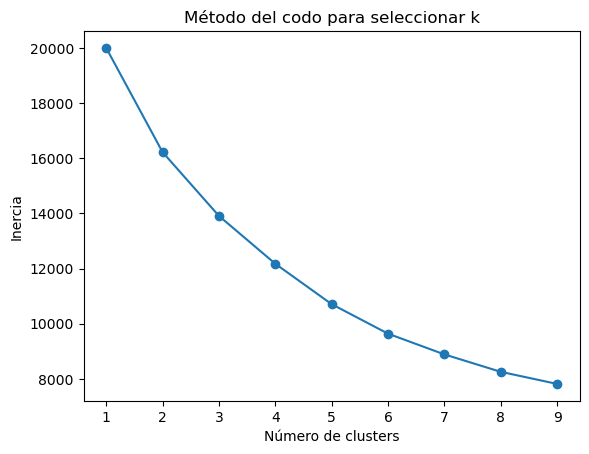

In [23]:
# Se eligue el numero de clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Método del codo para seleccionar k')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

# Usar k = 9 osea 9 clusters (Se puede cambiar)
kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Agregar resultado al DataFrame
df['cluster'] = clusters

In [ ]:
#El numero optimo de clusters es donde la curva se empieza a nivelar que en este caso seria 9

In [24]:
# Ver tamaño de cada clúster
print(df['cluster'].value_counts())

# Ver medias por clúster
print(df.groupby('cluster')[['vendedor_1', 'vendedor_2']].mean())

cluster
3    729
4    656
8    618
0    559
6    533
5    509
1    484
7    462
2    450
Name: count, dtype: int64
         vendedor_1  vendedor_2
cluster                        
0          4.119857   10.218247
1          2.737603    5.462810
2          7.295556    7.351111
3          4.547325    6.580247
4          4.173780    4.804878
5          5.037328   10.406680
6          6.726079    5.133208
7          8.290043    6.690476
8          3.435275    6.896440


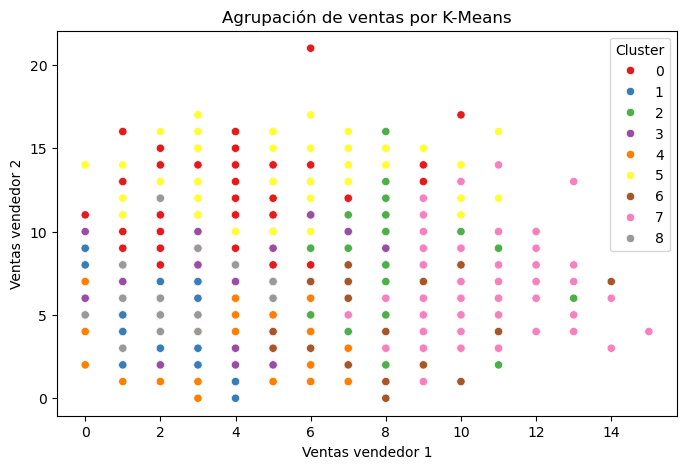

In [25]:
# Proyección con 2 variables para visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='vendedor_1', y='vendedor_2', hue='cluster', palette='Set1')
plt.title('Agrupación de ventas por K-Means')
plt.xlabel('Ventas vendedor 1')
plt.ylabel('Ventas vendedor 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#El algoritmo logró detectar patrones de comportamiento en las combinaciones de ventas.
#No hay un amontonamient claro de los clústeres, lo que indica que las ventas de los vendedores no son tan fácilmente separables, 
#pero sí hay cierta estructura.